In [1]:
!pip install mxnet-cu100

     |████████████████████████████████| 354.0 MB 5.3 kB/s 
  Attempting uninstall: graphviz
    Found existing installation: graphviz 0.10.1
    Uninstalling graphviz-0.10.1:
      Successfully uninstalled graphviz-0.10.1


# GAN + Autoencoders

In this Lab you'll lern how to build GAN networks and apply them to image generation with Autoencoders

## Refs
 - https://github.com/L1aoXingyu/mxnet-tutorial/blob/master/08-AutoEncoder/conv_autoencoder.py
 -



# Task: Pokemons

Lets use some funny example (we're using https://d2l.ai/chapter_generative-adversarial-networks/dcgan.html implementation here.

Pokemon dataset:
https://pokemondb.net/sprites
http://d2l-data.s3-accelerate.amazonaws.com/pokemon.zip
https://gist.github.com/armgilles/194bcff35001e7eb53a2a8b441e8b2c6

In [2]:
import mxnet as mx
from mxnet import gluon, init, np, npx, nd
from mxnet.gluon import nn
from statistics import mean

import numpy

from matplotlib import pyplot as plt
from tqdm import tqdm

npx.set_np()

In [31]:
def transform_image(data, label):
  data = data.transpose((2, 0, 1))
  return ((data.astype(np.float32)/255 - 0.5)/0.5, label.astype(np.float32))

In [47]:
# pokemon_dataset = mx.gluon.data.vision.datasets.ImageFolderDataset('./data/pokemon')

dataset = gluon.data.vision.datasets.MNIST()

In [78]:
# resize each image into 64x64
batch_size = 2048

transformer = gluon.data.vision.transforms.Compose([
    #gluon.data.vision.transforms.Resize(64),
    gluon.data.vision.transforms.ToTensor(),
    gluon.data.vision.transforms.Normalize(0.5, 0.5)
])

#data_loader = gluon.data.DataLoader(
#    pokemon_dataset.transform_first(transformer),
#    batch_size=batch_size,
#    shuffle=True )

data_loader = gluon.data.DataLoader(dataset.transform_first(transformer), batch_size = batch_size, shuffle = True)

In [57]:
def show_images(imgs, num_rows, num_cols, titles=None, scale=1.5):
    """Plot a list of images.

    Defined in :numref:`sec_fashion_mnist`"""
    figsize = (num_cols * scale, num_rows * scale)
    _, axes = plt.subplots(num_rows, num_cols, figsize=figsize)
    axes = axes.flatten()
    for i, (ax, img) in enumerate(zip(axes, imgs)):
        ax.imshow(img.squeeze().asnumpy())
        ax.axes.get_xaxis().set_visible(False)
        ax.axes.get_yaxis().set_visible(False)
        if titles:
            ax.set_title(titles[i])
    return axes

In [55]:
def show_one_image(img, title=None):
    """ Plots an image. """
    im_show = img.squeeze()
    plt.imshow(im_show.asnumpy())


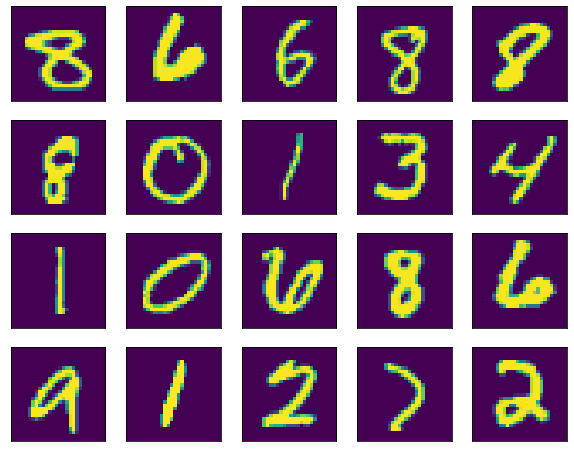

In [58]:
for X, y in data_loader:
    imgs = X[0:20,:,:,:].transpose(0, 2, 3, 1)/2+0.5
    show_images(imgs, num_rows=4, num_cols=5, scale=2)
    break

In [59]:
class autoencoder(nn.HybridBlock):
    def __init__(self):
        super(autoencoder, self).__init__()

        with self.name_scope():
            self.encoder = nn.HybridSequential('encoder_')
            with self.encoder.name_scope():
                # b, 16, 10, 10
                self.encoder.add(
                    nn.Conv2D(
                        16, 3, strides=3, padding=1, activation='relu'))
                self.encoder.add(nn.MaxPool2D(2, 2))  # b, 16, 5, 5
                self.encoder.add(
                    nn.Conv2D(8, 3, strides=2, padding=1,
                                activation='relu'))  # b, 8, 3, 3
                self.encoder.add(nn.MaxPool2D(2, 1))  # b, 8, 2, 2

            self.decoder = nn.HybridSequential('decoder_')
            with self.decoder.name_scope():
                self.decoder.add(
                    nn.Conv2DTranspose(16, 3, strides=2, activation='relu'))
                self.decoder.add(
                    nn.Conv2DTranspose(
                        8, 5, strides=3, padding=1, activation='relu'))
                self.decoder.add(
                    nn.Conv2DTranspose(
                        1, 2, strides=2, padding=1, activation='tanh'))

    def forward(self, x):
        tmp = self.encoder(x)
        result = self.decoder(tmp)
        return result

In [60]:
ctx = mx.gpu(0) if mx.context.num_gpus() > 0 else mx.cpu(0)

In [90]:
def train(model, data_iter, num_epochs, lr, ctx=ctx):

    criterion = gluon.loss.L2Loss()
    optimizer = gluon.Trainer(model.collect_params(), 'adam',
                      {'learning_rate': lr, 'wd': 1e-5})

    history = []

    for epoch in range(num_epochs):
        for data in data_iter:
            img, _ = data
            img = img.as_in_context(ctx)
            batch = img.shape[0]
            # ===================forward=====================
            with mx.autograd.record():
                output = model(img)
                loss = criterion(output, img)
            # ===================backward====================
            loss.backward()
            optimizer.step(batch)

            print_loss = loss.sum()/batch

            print(f'loss{print_loss:.3f}')

        # ===================log========================
        print('epoch [{}/{}], loss:{:.4f}'
              .format(epoch + 1, num_epochs, nd.mean(loss.as_nd_ndarray()).asscalar()))
        
        show_one_image(output[0], f'Epoch: {epoch}')


    return history

In [91]:
model = autoencoder()
model.hybridize()
model.collect_params().initialize(mx.init.Xavier('gaussian'), ctx=ctx)


In [ ]:
latent_dim, lr, num_epochs = 100, 0.005, 20
#latent_dim, lr, num_epochs = 100, 0.04, 5
hist = train(model, data_loader, num_epochs, lr)

loss0.432
loss0.399
loss0.366
loss0.336
loss0.308
loss0.284
loss0.264
loss0.248
loss0.241
loss0.230
loss0.222
loss0.215
loss0.213
loss0.210
loss0.205
loss0.201
loss0.198
loss0.198
loss0.196
loss0.195
loss0.190
loss0.190
loss0.186
loss0.182
loss0.185
loss0.179
loss0.180
loss0.178
loss0.178
loss0.174
epoch [1/20], loss:0.1743
loss0.177
loss0.174
loss0.171
loss0.172
loss0.170
loss0.171
loss0.169
loss0.167
loss0.167
loss0.166
loss0.165
loss0.162
loss0.160
loss0.160
loss0.159
loss0.158
loss0.154
loss0.153
loss0.149
loss0.146
loss0.146
loss0.143
loss0.141
loss0.141
loss0.139
loss0.139
loss0.137
loss0.135
loss0.134
loss0.137
epoch [2/20], loss:0.1368
loss0.133
loss0.134
loss0.133
loss0.133
loss0.133
loss0.131
loss0.130
loss0.130
loss0.130
loss0.128
loss0.128
loss0.129
loss0.129
loss0.128
loss0.126
loss0.127
loss0.127
loss0.126
loss0.125
loss0.125
loss0.125
loss0.125
loss0.126
loss0.125
loss0.124
loss0.123
loss0.124
loss0.123
loss0.122
loss0.121
epoch [3/20], loss:0.1207
loss0.122
loss0.122
lo

In [ ]:
def print_history(history, title):
    plt.figure(figsize=(7, 4))
    plt.plot(history)
    plt.title(title)
    plt.ylabel('Loss')
    plt.xlabel('Epoch')

In [ ]:
print_history(hist, 'AE Loss')

In [ ]:
# Show generated examples
Z = np.random.normal(0, 1, size=(5, latent_dim, 1, 1), ctx=ctx)
Z = Z.as_in_ctx(ctx)
Z.shape

(5, 100, 1, 1)